<a href="https://colab.research.google.com/github/dsubject/CoreComposeApp/blob/main/Analyzing_Historical_Stock_Revenue_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

## Question 1: Use yfinance to Extract Stock Data

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")  # Fetch all available data

# Reset the index
tesla_data.reset_index(inplace=True)

# Set display option to show all columns in a single row
pd.set_option("display.expand_frame_repr", False)

# Display the first 5 rows of the DataFrame
print(tesla_data.head())


                       Date      Open      High       Low     Close     Volume  Dividends  Stock Splits
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500        0.0           0.0
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500        0.0           0.0
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000        0.0           0.0
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000        0.0           0.0
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500        0.0           0.0


##Question 2: Use Webscraping to Extract Tesla Revenue Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Yahoo Finance URL for Tesla Analysis
url = "https://finance.yahoo.com/quote/TSLA/analysis/"

# Fetch the webpage content with headers
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Locate all tables on the webpage
tables = soup.find_all("table")

# Check if tables exist
if tables:
    # Parse the first table into a Pandas DataFrame
    tesla_table = pd.read_html(str(tables[0]))[0]

    # Display the last five rows of the table using tail()
    print(tesla_table.tail())
else:
    print("No tables found.")


   Currency in USD  Current Qtr. (Dec 2024)  Next Qtr. (Mar 2025)  Current Year (2024)  Next Year (2025)
0  No. of Analysts                    27.00                 15.00                37.00             36.00
1    Avg. Estimate                     0.76                  0.71                 2.49              3.26
2     Low Estimate                     0.59                  0.52                 2.17              2.05
3    High Estimate                     0.96                  0.96                 2.92              4.32
4     Year Ago EPS                     0.71                  0.45                 3.12              2.49


<ipython-input-24-b441c56f1811>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_table = pd.read_html(str(tables[0]))[0]


## Question 3: Use yfinance to Extract Stock Data

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd

# Download GameStop (GME) stock data
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  Dividends  Stock Splits
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000        0.0           0.0
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600        0.0           0.0
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600        0.0           0.0
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400        0.0           0.0
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800        0.0           0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Yahoo Finance URL for Gamestop Analysis
url = "https://finance.yahoo.com/quote/GME/analysis/"

# Fetch the webpage content with headers
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Locate all tables on the webpage
tables = soup.find_all("table")

# Check if tables exist
if tables:
    # Parse the first table into a Pandas DataFrame
    gme_table = pd.read_html(str(tables[0]))[0]

    # Display the last five rows of the table using tail()
    print(gme_table.tail())
else:
    print("No tables found.")

   Currency in USD  Current Qtr. (Jan 2025)  Next Qtr. (Apr 2025)  Current Year (2025)  Next Year (2026)
0  No. of Analysts                     2.00                  2.00                 2.00              2.00
1    Avg. Estimate                     0.08                 -0.04                 0.07              0.00
2     Low Estimate                     0.07                 -0.10                 0.06             -0.18
3    High Estimate                     0.09                  0.03                 0.08              0.18
4     Year Ago EPS                     0.22                 -0.12                 0.06              0.07


<ipython-input-28-50b57df3a480>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_table = pd.read_html(str(tables[0]))[0]


## Question 5: Plot Tesla Stock Graph

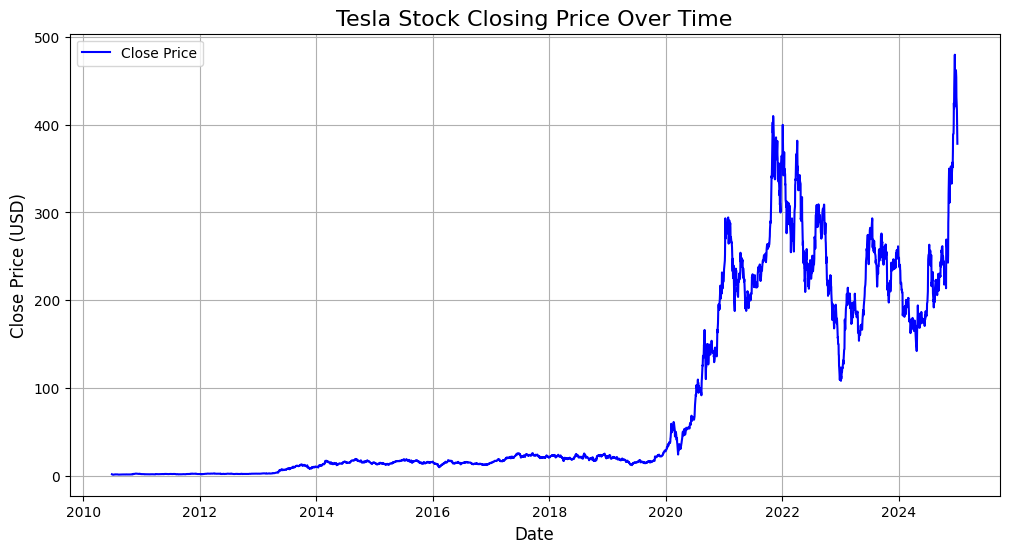

In [ ]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    """
    Plots the closing price of a stock over time.

    Parameters:
    - data: Pandas DataFrame with 'Date' and 'Close' columns.
    - title: Title of the graph (string).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Closing Price Over Time")


## Question 6: Plot GameStop Stock Graph

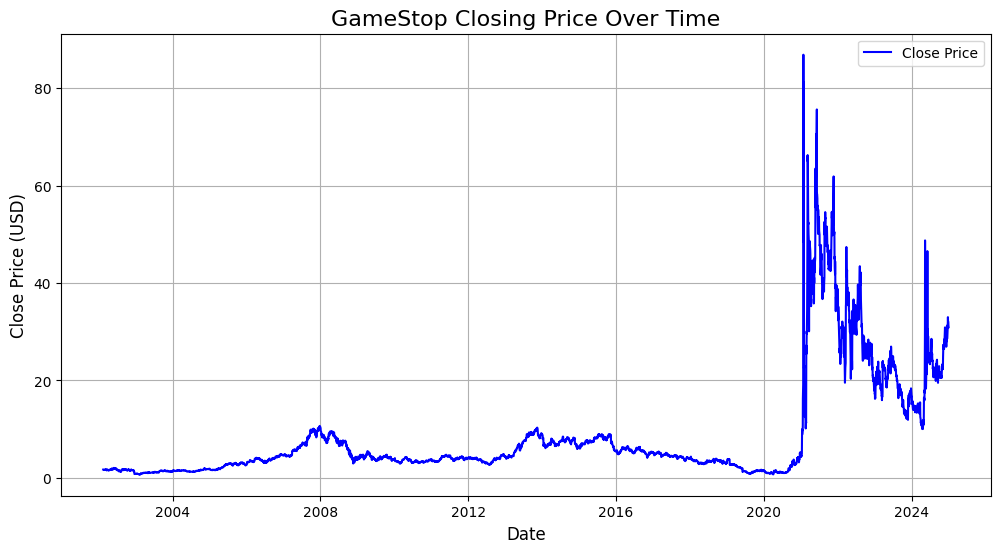

In [ ]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(data, title):
    """
    Plots the closing price of a stock over time.

    Parameters:
    - data: Pandas DataFrame with 'Date' and 'Close' columns.
    - title: Title of the graph (string).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(gme_data, "GameStop Closing Price Over Time")
